# NETSI Special Topic: Causal Analysis
## Jupyter notebook on mediation

Aliens are plotting against human species. They are trying to use CRISPR technique to genetically make humans crave for smoking! Ultimately they want all humans die due to lung cancer. To test out their plans, they plan to conduct a randomized controlled trial.


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



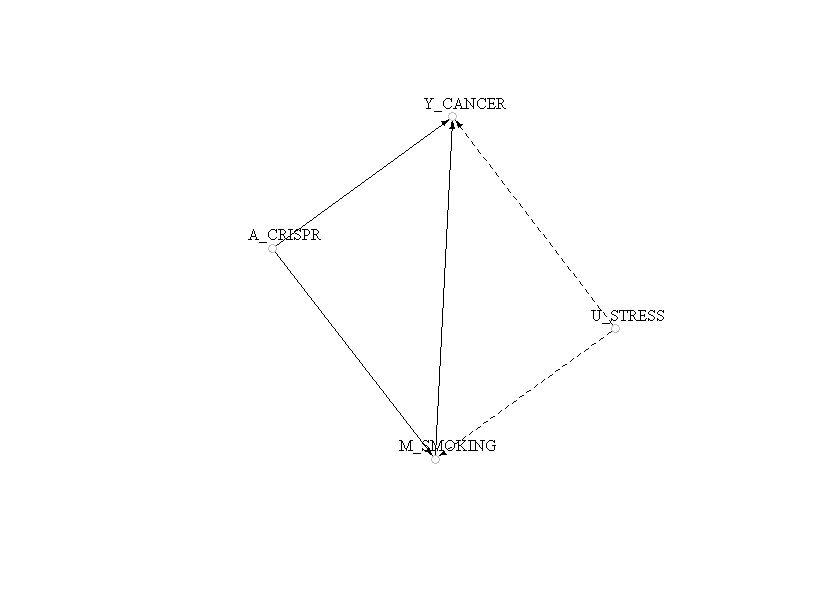

In [1]:
### DAG for causal chain
library(igraph)
g1 <- graph_from_literal(A_CRISPR--+M_SMOKING,A_CRISPR--+Y_CANCER,M_SMOKING--+Y_CANCER,U_STRESS--+M_SMOKING,U_STRESS--+Y_CANCER)
E(g1)$lty <- c(1,1,1,2,2)
options(repr.plot.height=5)
plot(g1, edge.arrow.size=0.5, edge.color="black", vertex.color="white", vertex.size=5, 
     vertex.frame.color="grey", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=1.5, edge.curved=0)

In [2]:
### Setup

library(lfe) # for OLS (easier robust SE)
set.seed(15)
N <- 500

### Simluation

## Create empty dataframe
df <- data.frame("ID" = 1:N)

## Simulate CRISPR treatment
df$A <- floor(runif(N, min=0, max=2))

## Simulate stress level (high vs low)
df$U <- floor(runif(N, min=0, max=2))

## Smoking level (high vs low)
df$M <- 1* (( 0.1*df$A + 0.8*df$U + runif(N, min=0, max=1) ) > 1)


## Lung cancer (yes or no)
#df$Y <- 1* (( 0.3*df$A + 0.3*df$U + 0.3*df$M + runif(N, min=0, max=1) ) > 1) # This is the version that Aliens have in mind
df$Y <- 1* (( 0.1*df$A + 0.8*df$U + runif(N, min=0, max=1) ) > 1) # Version we'll use: no indirect effect through smoking

head(df)

Loading required package: Matrix


ID,A,U,M,Y
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1
2,0,0,0,0
3,1,1,0,1
4,1,1,1,1
5,0,1,0,0
6,1,0,0,0


In [3]:
### Total effect of CRISPR treatment on lung cancer
TE <- felm(Y~A, data=df)
print(summary(TE))


Call:
   felm(formula = Y ~ A, data = df) 

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5275 -0.5275 -0.3745  0.4725  0.6256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.37445    0.03275  11.435  < 2e-16 ***
A            0.15302    0.04432   3.453 0.000602 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4934 on 498 degrees of freedom
Multiple R-squared(full model): 0.02338   Adjusted R-squared: 0.02142 
Multiple R-squared(proj model): 0.02338   Adjusted R-squared: 0.02142 
F-statistic(full model):11.92 on 1 and 498 DF, p-value: 0.0006015 
F-statistic(proj model): 11.92 on 1 and 498 DF, p-value: 0.0006015 




In [4]:
### Aliens are excited to find out that their CRISPR caused high likelihood of cancer.
### Is it through smoking, as they originally intended?
### We know the answer because we know the data generation process: No!
### CRISPR does cause people to smoke more, but in our hypothetical world smoking doesn't cause lung cancer
### (In real world it does, stay away from smoking if possible)

### Test for mediation often involves simply including the mediator variable into the regression
### If coefficient for A goes away as we include the mediator, 
### some researchers (falsely) believe the mediator is likely to be in the middle of major causal mechanism.
ME <- felm(Y~A+M, data=df)
print(summary(ME))


Call:
   felm(formula = Y ~ A + M, data = df) 

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8284 -0.1495 -0.1023  0.1716  0.8977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10230    0.02737   3.738 0.000207 ***
A            0.04719    0.03289   1.435 0.152029    
M            0.67889    0.03277  20.719  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3617 on 497 degrees of freedom
Multiple R-squared(full model): 0.476   Adjusted R-squared: 0.4739 
Multiple R-squared(proj model): 0.476   Adjusted R-squared: 0.4739 
F-statistic(full model):225.7 on 2 and 497 DF, p-value: < 2.2e-16 
F-statistic(proj model): 225.7 on 2 and 497 DF, p-value: < 2.2e-16 




**As we can see above, mediation analysis can lead to the false conclusion that their CRISPR was successful through the causal chain where people were more likely to smoke, which in turn causes lung cancer. The aliens were accidentally successful because the gene that they thought would induce poeple to smoke also had direct effect (not through smoking) on lung cancer!**